# Task 1
## Fake news detection

I need using the sklearn library, build a classical machine learning model that can determine with high accuracy of more than 90% whether the news is real or fake. I have dataset with russian news (RIA novosti) and with english news.

### Important notes : This project was created in educative purposes

<img src='./images/Fake-news.jpg' width="600px" height="400px" alt="Fake news image">

In [1]:
!pip install wordcloud

In [42]:
# Import libraries
import pandas as pd
import numpy as np
import itertools
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler # oversampling/undersampling data
import nltk # Stop words for Russian
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

## Read dataset and investigate it

In [43]:
df = pd.read_csv("df_final_2.csv") # dataset in the same directory
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45333 entries, 0 to 45332
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           45333 non-null  int64 
 1   url           45333 non-null  object
 2   title         45333 non-null  object
 3   subtitle      39337 non-null  object
 4   content       45333 non-null  object
 5   publish_date  45333 non-null  object
 6   views         45333 non-null  int64 
 7   topic         45333 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


In [44]:
# Get first 5 values from dataset
df.head()

uid                                                url  \
0  1949795185  https://ria.ru/20240531/mishustin-1949795185.html   
1  1949788453      https://ria.ru/20240531/putin-1949788453.html   
2  1949748360  https://ria.ru/20240531/gubernator-1949748360....   
3  1949723695  https://ria.ru/20240531/fedorischev-1949723695...   
4  1949703668     https://ria.ru/20240531/samara-1949703668.html   

                                               title  \
0  Мишустин образовал президиум правительства в н...   
1  Путин освободил Логинова от должности статс-се...   
2  На билбордах в Тюмени появились надписи в подд...   
3  Спикер Тульской облдумы назвал Федорищева тала...   
4  Церемония представления врио главы Самарской о...   

                                            subtitle  \
0  Михаил Мишустин подписал постановление об обра...   
1  Путин освободил Андрея Логинова от должности с...   
2  На билбордах в Тюмени появились надписи в подд...   
3  Воробьев: Федорищев проявил себя как талантлив...   
4  Полпред Комаров 3 июня представит врио губерна...   

                                             content      publish_date  views  \
0  МОСКВА, 31 мая - РИА Новости. Премьер-министр ...  21:40 31.05.2024  10633   
1  МОСКВА, 31 мая - РИА Новости. Президент России...  20:43 31.05.2024   1202   
2  ТЮМЕНЬ, 31 мая – РИА Новости. После назначения...  17:59 31.05.2024   4967   
3  ЯРОСЛАВЛЬ, 31 мая – РИА Новости. Назначенный в...  16:37 31.05.2024    240   
4  САМАРА, 31 мая - РИА Новости. Полномочный пред...  15:43 31.05.2024   2004   

      topic  
0  politics  
1  politics  
2  politics  
3  politics  
4  politics

In [45]:
# Get shape of dataset
df.shape

(45333, 8)

In [46]:
# Check nulls and empty values
df.isnull()

uid    url  title  subtitle  content  publish_date  views  topic
0      False  False  False     False    False         False  False  False
1      False  False  False     False    False         False  False  False
2      False  False  False     False    False         False  False  False
3      False  False  False     False    False         False  False  False
4      False  False  False     False    False         False  False  False
...      ...    ...    ...       ...      ...           ...    ...    ...
45328  False  False  False      True    False         False  False  False
45329  False  False  False      True    False         False  False  False
45330  False  False  False      True    False         False  False  False
45331  False  False  False     False    False         False  False  False
45332  False  False  False      True    False         False  False  False

[45333 rows x 8 columns]

In [47]:
df.isnull().sum()

uid                0
url                0
title              0
subtitle        5996
content            0
publish_date       0
views              0
topic              0
dtype: int64

In [48]:
df = df.drop(columns=['subtitle', 'uid', 'url', 'views'])
print("Dataset without unnecessary columns:")
df.info()
print("Check null in data :")
df.isnull().sum()

Dataset without unnecessary columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45333 entries, 0 to 45332
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         45333 non-null  object
 1   content       45333 non-null  object
 2   publish_date  45333 non-null  object
 3   topic         45333 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB
Check null in data :


title           0
content         0
publish_date    0
topic           0
dtype: int64

In [49]:
# Check last 5 values from dataset
df.tail()

title  \
45328  Элладская церковь призвала священников не сабо...   
45329  Православные отмечают праздник бессребреников ...   
45330   Военные дезинфицировали храмы под Екатеринбургом   
45331  Празднование Курбан-байрама в Крыму пройдет бе...   
45332  В РПЦ прокомментировали спор властей Черногори...   

                                                 content      publish_date  \
45328  АФИНЫ, 14 июл – РИА Новости. Постоянный Синод ...  12:01 14.07.2021   
45329  МОСКВА, 14 июл – РИА Новости. Православная цер...  00:00 14.07.2021   
45330  ЕКАТЕРИНБУРГ, 13 июл – РИА Новости. Специалист...  19:51 13.07.2021   
45331  СИМФЕРОПОЛЬ, 13 июл – РИА Новости. Мусульманск...  17:54 13.07.2021   
45332  МОСКВА, 13 июл - РИА Новости. Русская правосла...  15:00 13.07.2021   

          topic  
45328  religion  
45329  religion  
45330  religion  
45331  religion  
45332  religion

## Create function to determine label value

In [50]:
# Add column label with value - REAL/FAKE

fake_keywords = {
    # Эмоционально заряженные слова
    'emotional': [
        'позор', 'предатель', 'враг', 'сволочи', 
        'геноцид', 'каратели', 'тотальный разгром',
        'сокрушительное поражение', 'позорище', 'предательство'
    ],
    # Конспирология
    'conspiracy': [
        'мировой заговор', 'глубинное государство', 'глобалисты',
        'рептилоиды', 'сорос', 'чипирование', 'всемирный заговор',
        'тайное правительство'
    ],
    # Сенсационность/драматизация
    'sensational': [
        'апокалипсис', 'крах', 'конец света', 'катастрофа',
        'ужасающие последствия', 'непоправимый урон', 'полное уничтожение'
    ],
    # Неопределенные формулировки
    'vague': [
        'эксперты считают', 'по неподтверждённым данным',
        'в кругах говорят', 'по некоторым сведениям',
        'анонимный источник сообщил', 'как стало известно',
        'по слухам', 'неофициально'
    ],
    # Манипулятивные техники
    'manipulative': [
        'западная пропаганда', 'фейковые новости',
        'ложные заявления', 'вброс информации',
        'дезинформация', 'провокация'
    ]
}

category_specific = {
    'politics': fake_keywords['emotional'],
    'health': [
        'вакцинация как чипирование', 'смертельные вакцины',
        'скрытые эффекты лекарств', 'фармацевтический заговор',
        'альтернативное лечение', 'запрещенные методы'
    ],
    'science': [
        'опровержение науки', 'скрытые технологии',
        'ученые скрывают', 'научный заговор',
        'фальсификация исследований'
    ],
    'economics': [
        'глобальный кризис', 'крах экономики',
        'финансовый апокалипсис', 'обвал рынка',
        'дефолт неизбежен', 'гиперинфляция'
    ]
}

def determine_label(row):
    text = (str(row['title']) + ' ' + str(row.get('content', ''))).lower()
    topic = row['topic']

    # Check common criteries for all categories
    for category, keywords in fake_keywords.items():
        for keyword in keywords:
            if keyword in text:
                return 'FAKE'

    # Check specific criteries for category
    if topic in category_specific:
        for keyword in category_specific[topic]:
            if keyword in text:
                return 'FAKE'

    # Check on excess amount of exclamation marks
    if text.count('!') > 5:
        return 'FAKE'

    # Check CAPSLOCK in title
    if len(str(row['title'])) > 0 and sum(1 for c in row['title'] if c.isupper()) / len(row['title']) > 0.5:
        return 'FAKE'

    return 'REAL'


df['label'] = df.apply(determine_label, axis=1)

## Evaluate label values

In [51]:
df.label

0        REAL
1        REAL
2        REAL
3        REAL
4        REAL
         ... 
45328    REAL
45329    REAL
45330    REAL
45331    REAL
45332    REAL
Name: label, Length: 45333, dtype: object

In [52]:
df.label.value_counts()

label
REAL    43298
FAKE     2035
Name: count, dtype: int64

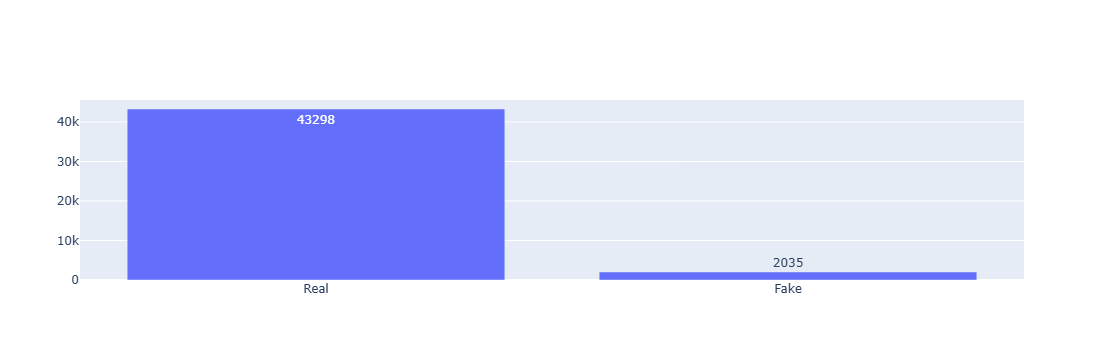

In [53]:
i=df.label.value_counts()

fig = go.Figure(data=[go.Bar(
            x=['Real','Fake'], y=i,
            text=i,
            textposition='auto',
        )])

fig.show()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    df['content'], 
    df['label'], 
    test_size=0.2, 
    random_state=7, 
    stratify=df['label'] # When splitting we preserve the ratio of classes
)

In [55]:
X_train

40489    МОСКВА, 2 мая - РИА Новости. Благодатный огонь...
37982    МОСКВА, 14 апр — РИА Новости. Кинокритик Юрий ...
1871     МОСКВА, 17 мар - РИА Новости. Владимир Путин л...
42707    МОСКВА, 28 мар - РИА Новости. Папа Римский Фра...
14508    МОСКВА, 27 дек - РИА Новости. Федеральная тамо...
                               ...                        
5750     ТАШКЕНТ, 28 мая - РИА Новости. Россия готова д...
29661    МОСКВА, 21 янв - РИА Новости. Ударная группа а...
20433    МОСКВА, 30 мая - РИА Новости. Пассажирский Air...
10812    МОСКВА, 16 мая - РИА Новости. Группа "Тинькофф...
22936    ДОНЕЦК, 29 апр - РИА Новости. Украинские войск...
Name: content, Length: 36266, dtype: object

In [56]:
X_train.shape

(36266,)

In [57]:
y_train

40489    REAL
37982    REAL
1871     REAL
42707    REAL
14508    REAL
         ... 
5750     REAL
29661    REAL
20433    REAL
10812    REAL
22936    REAL
Name: label, Length: 36266, dtype: object

In [58]:
y_train.shape

(36266,)

In [59]:
X_test.shape

(9067,)

In [60]:
y_test.shape

(9067,)

## Create model

In [61]:
# Create TfidfVectorizer with russian stop-words
nltk.download('stopwords')
russian_stop_words = stopwords.words('russian')

tfidf_vectorizer = TfidfVectorizer(
    stop_words=russian_stop_words, 
    max_df=0.7, 
    ngram_range=(1,2) # Capture bitgrams for impoving quality
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mkalugin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [63]:
# Create RandomOverSampler to solve disbalance issue
ros = RandomOverSampler(random_state=7)
X_resampled, y_resampled = ros.fit_resample(tfidf_train, y_train)

In [64]:
# Create PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=1000, class_weight="balanced", random_state=7)
# Model knows about disbalance
# pac.fit(tfidf_train,y_train)
pac.fit(X_resampled, y_resampled)

PassiveAggressiveClassifier(class_weight='balanced', random_state=7)

In [65]:
y_pred = pac.predict(tfidf_test)

## Evaluate model

In [66]:
# Calculate accuracy
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 96.85%


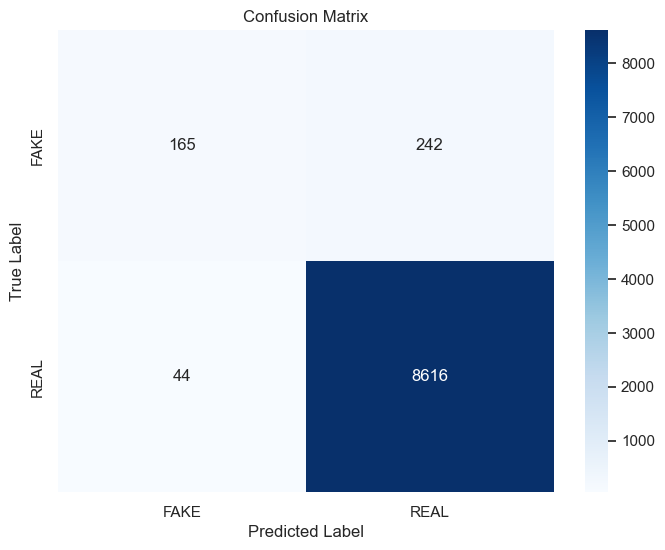

In [67]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["FAKE", "REAL"], yticklabels=["FAKE", "REAL"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [62]:
# Report
print('\n clasification report:\n',classification_report(y_test,y_pred))


 clasification report:
               precision    recall  f1-score   support

        FAKE       0.53      0.59      0.56       407
        REAL       0.98      0.98      0.98      8660

    accuracy                           0.96      9067
   macro avg       0.76      0.78      0.77      9067
weighted avg       0.96      0.96      0.96      9067



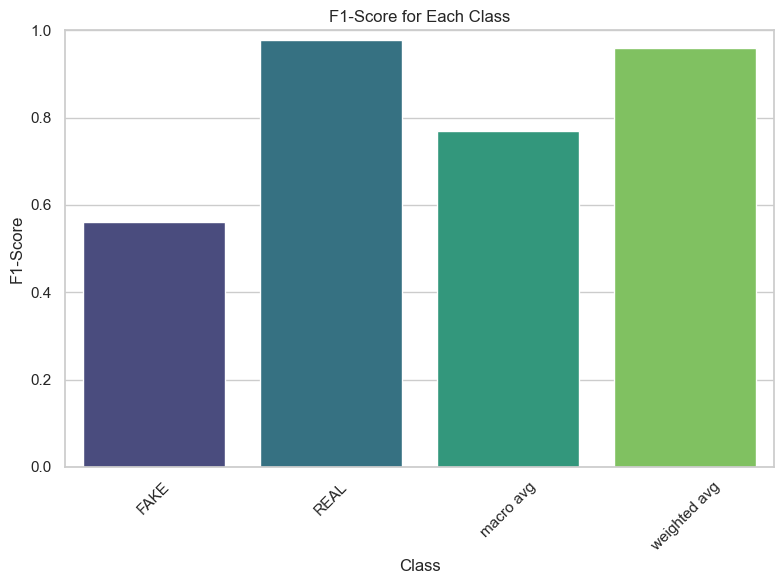

In [63]:
report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()
df_report = df_report.drop(['accuracy'])

plt.figure(figsize=(8, 6))
sns.barplot(x=df_report.index, y='f1-score', data=df_report, palette='viridis')

plt.title('F1-Score for Each Class')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

## Word Cloud Visualisation

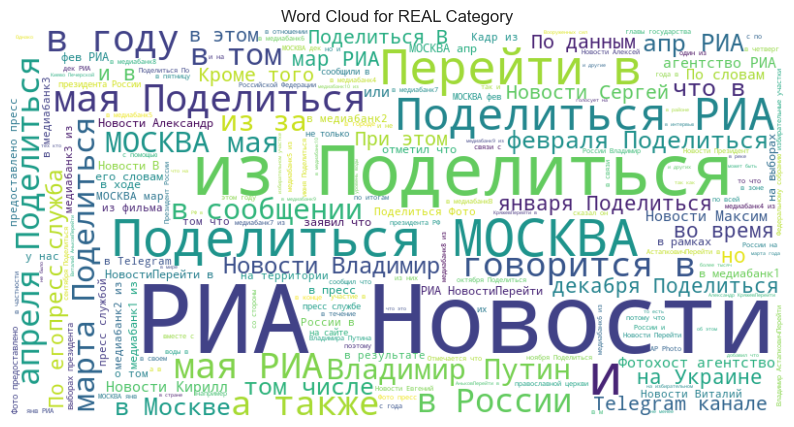

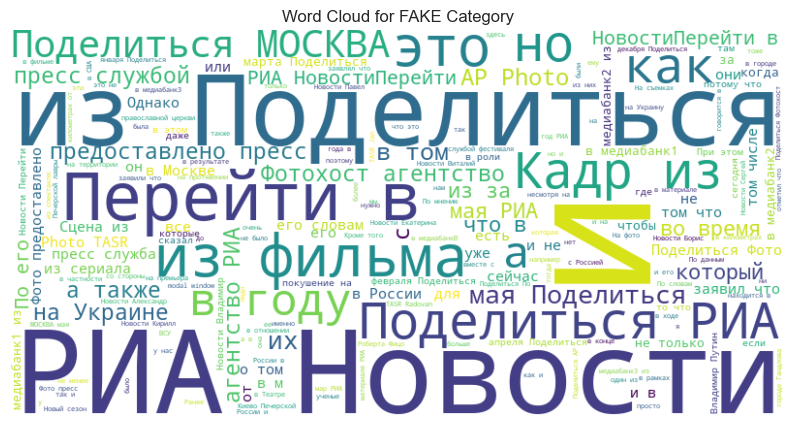

In [68]:
for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['content'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label} Category')
    plt.show()

## Test model

In [69]:
# Prediction
def predict_news(text, model, vectorizer):
    try:
        text_vectorized = vectorizer.transform([text])
        prediction = model.predict(text_vectorized)[0]
        print(f"Current text: {text}")
        print(f"Result: {prediction}")

        return prediction
    except Exception as e:
        print(f"Error while handling text: {str(e)}")
        return None

test_text = '"Апокалипсис!!!!!!!!"'
predict_news(test_text, pac, tfidf_vectorizer)

Current text: "Апокалипсис!!!!!!!!"
Result: REAL


np.str_('REAL')

### Conclusion: 
In the first realization I had HUGE data disbalabce with accuracy more that 97 %, but in classification report recall was 0.50. To solve this solution I decided to use class_weight="balanced". Also in that cases more important metric is precision and recall. Those parameters was about 0.5.
Also good solution is to use - RandomOverSampler. And also write good determine_label function.

# Using dataset with determined labes

In [70]:
# Dataset with determined labels
df = pd.read_csv("fake_news.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [71]:
df.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [72]:
df.shape

(6335, 4)

In [73]:
df.isnull()

Unnamed: 0  title   text  label
0          False  False  False  False
1          False  False  False  False
2          False  False  False  False
3          False  False  False  False
4          False  False  False  False
...          ...    ...    ...    ...
6330       False  False  False  False
6331       False  False  False  False
6332       False  False  False  False
6333       False  False  False  False
6334       False  False  False  False

[6335 rows x 4 columns]

In [74]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

## Visualize count of label values

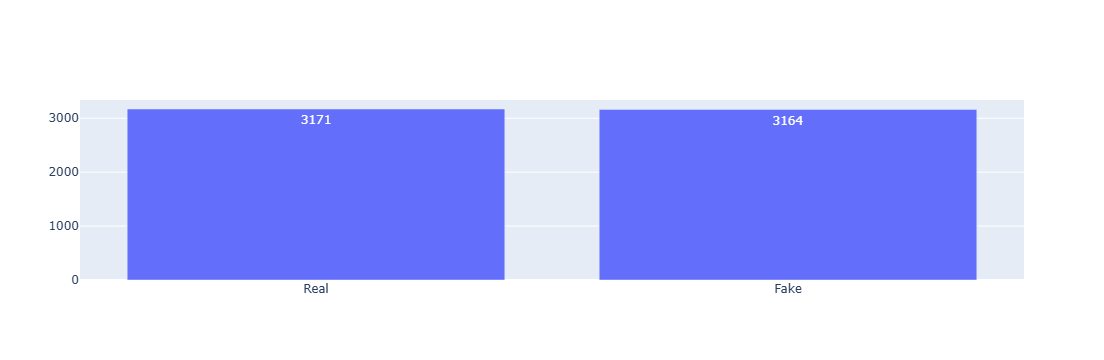

In [75]:
i=df.label.value_counts()

fig = go.Figure(data=[go.Bar(
            x=['Real','Fake'], y=i,
            text=i,
            textposition='auto',
        )])

fig.show()

In [76]:
df.describe()

Unnamed: 0
count   6335.000000
mean    5280.415627
std     3038.503953
min        2.000000
25%     2674.500000
50%     5271.000000
75%     7901.000000
max    10557.000000

In [77]:
from sklearn.utils import shuffle
# Shuffle rows of dataframe in a random order to remove
# any possible order that might affect analysis algorithms
# or model training
# Param random_state = 42 guarantees reproducibility
# the mixing result will be the same at each run, which
# is important for debugging and repeatability of experiments.
# After shuffling the index is reset using reset_index method
# so that the indexes go in a row from 0 without preserving
# the old index.
df = shuffle(df, random_state=42).reset_index(drop=True)

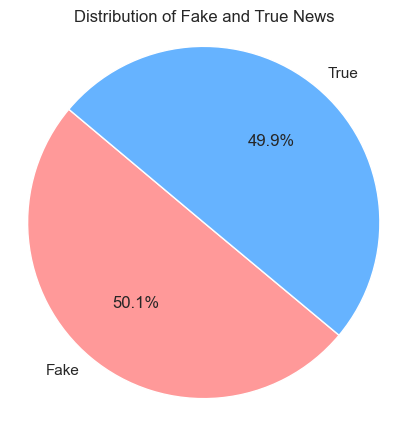

In [78]:
plt.figure(figsize=(5, 5))
plt.pie(df['label'].value_counts(), labels=['Fake', 'True'], autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B3FF'])
plt.title('Distribution of Fake and True News')
plt.axis('equal')  
plt.show()

## Text Preprocessing

In [79]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # remove special characters 
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back to a single string
    text= ' '.join(tokens)
    return text

In [80]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

df['text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mkalugin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mkalugin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mkalugin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [81]:
df.head()

Unnamed: 0                                              title  \
0        9957                          American Dream, Revisited   
1        7596  Clintons Are Under Multiple FBI Investigations...   
2        8905  The FBI Can’t Actually Investigate a Candidate...   
3        8752  Confirmed: Public overwhelmingly (10-to-1) say...   
4        7804    Nanny In Jail After Force Feeding Baby To Death   

                                                text label  
0  trump pull brexit time ten would take beyond w...  FAKE  
1  clinton multiple fbi investigation agent stymi...  FAKE  
2  dispatch eric zuesse piece crossposted strateg...  FAKE  
3  print ed every facade crack somebody asks ques...  FAKE  
4  nanny jail force feeding baby death share ike ...  FAKE

In [82]:
df = df.drop(columns=['title'])

In [83]:
df['text'][1]

'clinton multiple fbi investigation agent stymied source wall street parade disgraced former congressman anthony weiner wife longtime hillary clinton aide huma abedin current former fbi official launched medium counteroffensive engage head head clinton medium machine throw shackle loretta lynch justice department used stymie multiple investigation clinton paytoplay network past weekend former fbi assistant director current cnn senior law enforcement analyst tom fuentes told viewer fbi intensive investigation ongoing clinton foundation said received information senior official fbi several bureau see video clip cnn information supported indepth article last evening wall street journal devlin barrett according barrett probe foundation began year ago determine whether financial crime influence peddling occurred related charity barretts article suggests justice department oversees fbi attempted circumvent investigation new revelation lead appearance wrongdoing part u attorney general lorett

## Encoding Using TF_IDF

In [84]:
TfidfVector = TfidfVectorizer(max_features=20000, ngram_range=(1, 2))
X = TfidfVector.fit_transform(df['text'])
y = df['label']

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [86]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5068, 20000), (1267, 20000), (5068,), (1267,))

# Logistic Regression

In [87]:
LR_Model = LogisticRegression(max_iter=1000)
LR_Model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [88]:
y_pred = LR_Model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print('classification_report:\n', classification_report(y_test, y_pred, target_names=['Fake', 'True']))
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')

classification_report:
               precision    recall  f1-score   support

        Fake       0.90      0.93      0.92       659
        True       0.93      0.89      0.91       608

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

Logistic Regression Accuracy: 91.40%


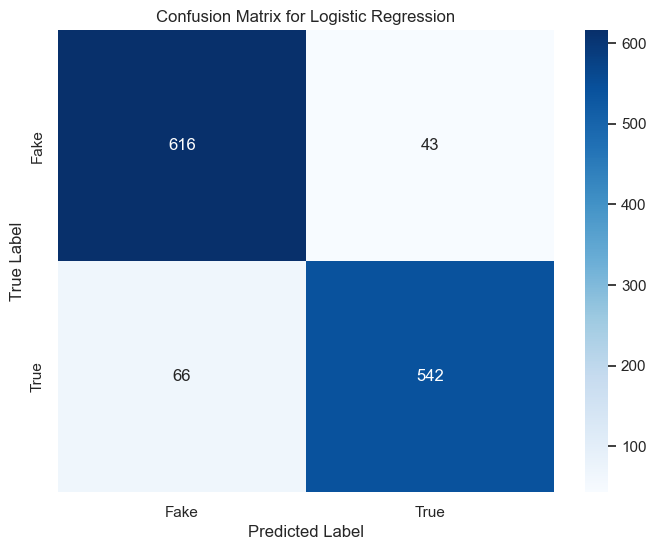

In [89]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## SVC Model

In [90]:
SVC_Model = SVC(kernel='linear', random_state=23)
SVC_Model.fit(x_train, y_train)

SVC(kernel='linear', random_state=23)

In [91]:
y_pred_svc = SVC_Model.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print('classification_report:\n', classification_report(y_test, y_pred_svc, target_names=['Fake', 'True']))
print(f'SVC Model Accuracy: {accuracy_svc * 100:.2f}%')

classification_report:
               precision    recall  f1-score   support

        Fake       0.93      0.94      0.93       659
        True       0.93      0.92      0.93       608

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

SVC Model Accuracy: 93.05%


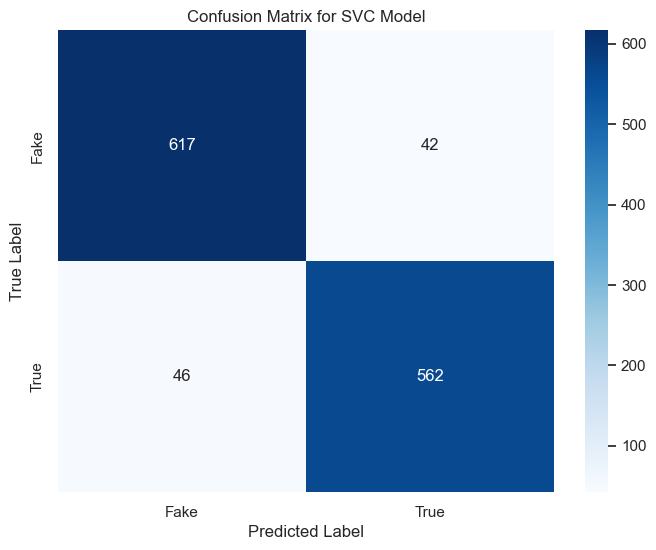

In [92]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix for SVC Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Word Cloud Visualization

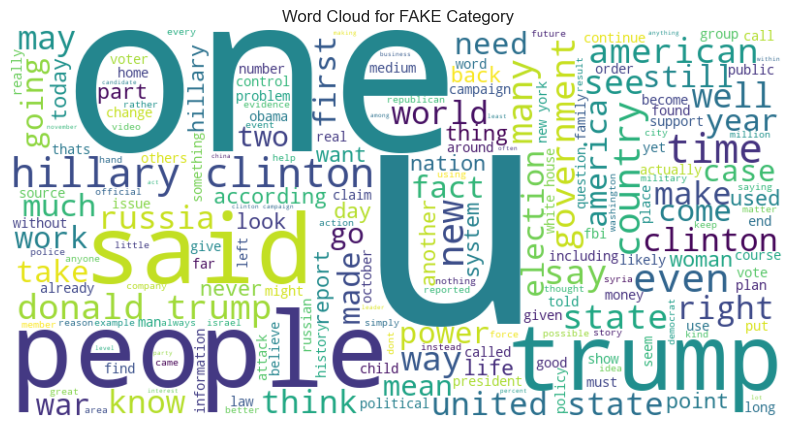

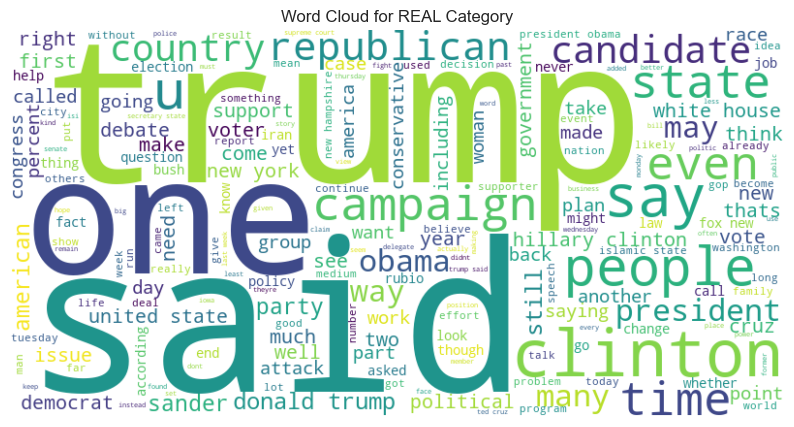

In [93]:
for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['text'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label} Category')
    plt.show()

## Test models

In [97]:
# SVC model prediction

test_text = (
    "President Donald Trump’s crusade against crime in the nation’s capital has "
    "resulted in more than 450 arrests since Aug. 7, the White House announced Tuesday morning. "
    "Those arrests, fueled by an increase in federal agents on city streets, run the gamut of "
    "charges, from murder and assault to driving under the influence."
)
    
predict_news(test_text, SVC_Model, TfidfVector)

Current text: President Donald Trump’s crusade against crime in the nation’s capital has resulted in more than 450 arrests since Aug. 7, the White House announced Tuesday morning. Those arrests, fueled by an increase in federal agents on city streets, run the gamut of charges, from murder and assault to driving under the influence.
Result: FAKE


'FAKE'

In [98]:
# LR model prediction

test_text = (
    "Over the past decade, the number of homeless individuals has increased each year, " 
    "at a rate that has only accelerated. Last year, rates jumped by 18 percent, totaling 771,480 "
    "unhoused individuals in the United States. And the situation is likely to get worse before it "
    "gets better. Cuts to health care and food programs, soaring housing costs, and newer proposals "
    "by the Trump administration to pare back housing assistance all threaten to worsen "
    "homelessness — not just in Washington, but around the country."
)
    
predict_news(test_text,LR_Model, TfidfVector)

Current text: Over the past decade, the number of homeless individuals has increased each year, at a rate that has only accelerated. Last year, rates jumped by 18 percent, totaling 771,480 unhoused individuals in the United States. And the situation is likely to get worse before it gets better. Cuts to health care and food programs, soaring housing costs, and newer proposals by the Trump administration to pare back housing assistance all threaten to worsen homelessness — not just in Washington, but around the country.
Result: FAKE


'FAKE'

## Conclusion : 
In this case I've trained two models (Logistic Regression and SVC) with accuracy 90%+. Both models give high accuracy. Data is well suited for the binary classification task. SVC showed a slightly better result (about 1%), but the increase is insignificant. I can say that in case we need interpretability and speed - Logistic Regression could be better choice. If slightly better quality is more important and there is not much data - SVC better solution.

# Task 2: 

## Predict Parkinson's disease

Predict Parkinson's disease at an early stage using the XGBoost machine learning algorithm and the sklearn library for feature normalization.
The samples are divided in the ratio 80% training, 20% testing.
Usefull links :

<img src='./images/Parkinsons.png' width="600px" height="400px" alt="Parkinson image">

In [3]:
!pip install xgboost
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('parkinsons.data', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [6]:
df.shape

(195, 24)

In [7]:
def parse_names_file(filename):
    attribute_descriptions = {}
    
    with open(filename, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        start_parsing = False
        
        for line in lines:
            line = line.strip()
            
            if 'Matrix column entries (attributes):' in line:
                start_parsing = True
                continue
                
            if start_parsing and line == '':
                break
                
            if start_parsing and ' - ' in line:
                parts = line.split(' - ', 1)
                if len(parts) == 2:
                    attr_names = parts[0].strip()
                    description = parts[1].strip()
                    
                    individual_attrs = [a.strip() for a in attr_names.split(',')]
                    
                    for attr in individual_attrs:
                        attribute_descriptions[attr] = description
    
    return attribute_descriptions

In [8]:
descriptions = parse_names_file('parkinsons.names')
print("Attribute description:")
for attr, desc in descriptions.items():
    print(f"{attr}: {desc}")

Attribute description:
name: ASCII subject name and recording number
MDVP:Fo(Hz): Average vocal fundamental frequency
MDVP:Fhi(Hz): Maximum vocal fundamental frequency
MDVP:Flo(Hz): Minimum vocal fundamental frequency
MDVP:Jitter(%): Several
MDVP:Jitter(Abs): Several
MDVP:RAP: Several
MDVP:PPQ: Several
Jitter:DDP: Several
MDVP:Shimmer: Several measures of variation in amplitude
MDVP:Shimmer(dB): Several measures of variation in amplitude
Shimmer:APQ3: Several measures of variation in amplitude
Shimmer:APQ5: Several measures of variation in amplitude
MDVP:APQ: Several measures of variation in amplitude
Shimmer:DDA: Several measures of variation in amplitude
NHR: Two measures of ratio of noise to tonal components in the voice
HNR: Two measures of ratio of noise to tonal components in the voice
status: Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE: Two nonlinear dynamical complexity measures
D2: Two nonlinear dynamical complexity measures
DFA: Signal fractal scal

## Display description

In [9]:
from IPython.display import display, HTML

def display_parkinson_attributes(descriptions):
    df = pd.DataFrame(list(descriptions.items()), columns=['Attribute', 'Description'])
    
    styles = [
        {'selector': 'th', 'props': [
            ('background-color', '#2E7D32'),
            ('color', 'white'),
            ('font-weight', 'bold'),
            ('padding', '15px'),
            ('text-align', 'center'),
            ('font-size', '16px'),
            ('border', '1px solid #1B5E20')
        ]},
        # Block of data
        {'selector': 'td', 'props': [
            ('background-color', '#000000'),
            ('color', 'white'),
            ('padding', '12px'),
            ('border', '1px solid #333333'),
            ('text-align', 'center'),
            ('font-size', '14px')
        ]},
        # Odd strings
        {'selector': 'tr:nth-child(even) td', 'props': [
            ('background-color', '#1A1A1A'),
        ]},
        # Even strings
        {'selector': 'tr:nth-child(odd) td', 'props': [
            ('background-color', '#000000'),
        ]},
        # Hover effect
        {'selector': 'tr:hover td', 'props': [
            ('background-color', '#2E7D32'),
            ('color', 'white'),
            ('transition', 'background-color 0.3s ease')
        ]},
        # Table props
        {'selector': 'table', 'props': [
            ('border-collapse', 'collapse'),
            ('width', '100%'),
            ('margin', '20px 0'),
            ('border-radius', '8px'),
            ('overflow', 'hidden'),
            ('box-shadow', '0 4px 8px rgba(0,0,0,0.3)')
        ]}
    ]
    
    display(HTML(f"""
    <div style="width: 100%; display: flex; justify-content: center;">
        <div style="width: 90%; max-width: 1200px;">
            <h2 style='
                color: #4CAF50; 
                border-bottom: 2px solid #2E7D32; 
                padding-bottom: 10px; 
                text-align: left;
                margin-bottom: 20px;
                font-size: 24px;
                width: 50%;
            '>
                🧠 Parkinson's Disease Dataset Attributes
            </h2>
    """))
    
    styled_df = df.style.set_table_styles(styles).hide(axis='index')
    display(styled_df)
    
    display(HTML("""
        </div>
    </div>
    """))

descriptions = parse_names_file('parkinsons.names')
display_parkinson_attributes(descriptions)


Target Distribution:
status
1    147
0     48
Name: count, dtype: int64


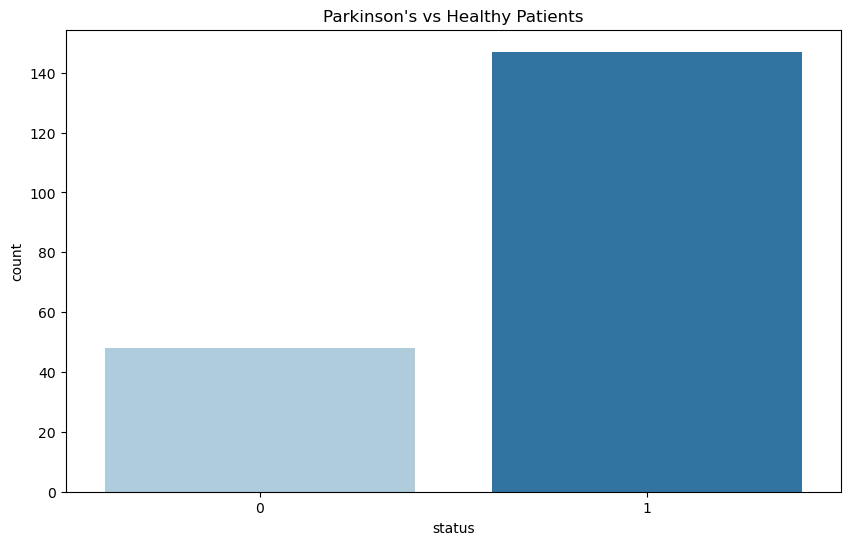

In [10]:
# Check target distribution (1 = Parkinson's, 0 = Healthy)
print("\nTarget Distribution:")
print(df['status'].value_counts())

# Visualize feature distributions
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=df, palette='Paired')
plt.title("Parkinson's vs Healthy Patients")
plt.show()

In [11]:
# Separate features (X) and target (y)
X = df.drop(['name', 'status'], axis=1)  # 'name' is non-predictive
y = df['status']

In [12]:
X

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00009   0.00544   0.00781     0.01633       0.05233   
3             0.00009   0.00502   0.00698     0.01505       0.05492   
4             0.00011   0.00655   0.00908     0.01966       0.06425   
..                ...       ...       ...         ...           ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE  \
0               0.426  ...   0.02971      0.06545  0.02211  21.033  0.414783   
1               0.626  ...   0.04368      0.09403  0.01929  19.085  0.458359   
2               0.482  ...   0.03590      0.08270  0.01309  20.651  0.429895   
3               0.517  ...   0.03772      0.08771  0.01353  20.644  0.434969   
4               0.584  ...   0.04465      0.10470  0.01767  19.649  0.417356   
..                ...  ...       ...          ...      ...     ...       ...   
190             0.405  ...   0.02745      0.07008  0.02764  19.517  0.448439   
191             0.263  ...   0.01879      0.04812  0.01810  19.147  0.431674   
192             0.256  ...   0.01667      0.03804  0.10715  17.883  0.407567   
193             0.241  ...   0.01588      0.03794  0.07223  19.020  0.451221   
194             0.190  ...   0.01373      0.03078  0.04398  21.209  0.462803   

          DFA   spread1   spread2        D2       PPE  
0    0.815285 -4.813031  0.266482  2.301442  0.284654  
1    0.819521 -4.075192  0.335590  2.486855  0.368674  
2    0.825288 -4.443179  0.311173  2.342259  0.332634  
3    0.819235 -4.117501  0.334147  2.405554  0.368975  
4    0.823484 -3.747787  0.234513  2.332180  0.410335  
..        ...       ...       ...       ...       ...  
190  0.657899 -6.538586  0.121952  2.657476  0.133050  
191  0.683244 -6.195325  0.129303  2.784312  0.168895  
192  0.655683 -6.787197  0.158453  2.679772  0.131728  
193  0.643956 -6.744577  0.207454  2.138608  0.123306  
194  0.664357 -5.724056  0.190667  2.555477  0.148569  

[195 rows x 22 columns]

In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

## Create model

In [14]:
# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=23
)

In [15]:
# Initialize XGBoost classifier
model = XGBClassifier(
    n_estimators=100, # number of trees
    learning_rate=0.1, # learning coefficient
    max_depth=3, # maximum tree depth
    random_state=23 # seed for random
)

In [16]:
# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [17]:
# Predict on test set
y_pred = model.predict(X_test)

## Evaluate model

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.31%


In [19]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.97      0.94      0.95        31

    accuracy                           0.92        39
   macro avg       0.87      0.91      0.89        39
weighted avg       0.93      0.92      0.92        39



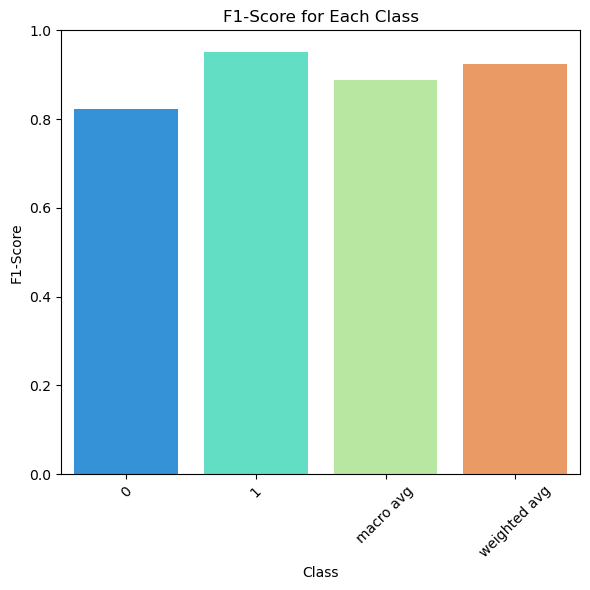

In [20]:
report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()
df_report = df_report.drop(['accuracy'])

plt.figure(figsize=(6, 6))
sns.barplot(x=df_report.index, y='f1-score', data=df_report, palette='rainbow')

plt.title('F1-Score for Each Class')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

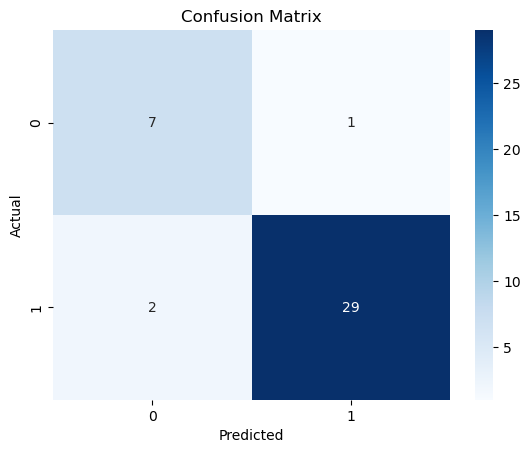

In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

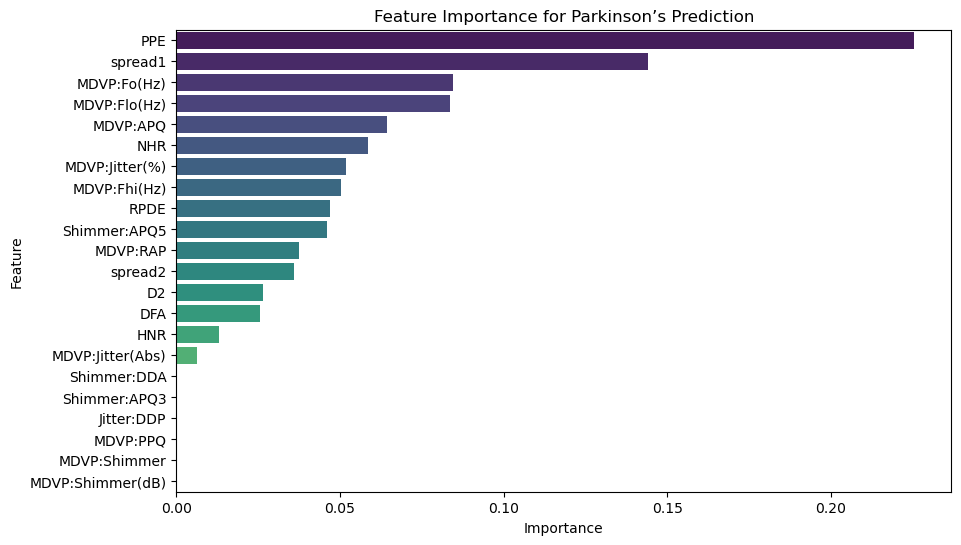

In [22]:
# Plot feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance for Parkinson’s Prediction')
plt.show()

## Try to improve accuracy

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
opt_model = XGBClassifier(
    n_estimators=200,  # add count of trees
    learning_rate=0.05, # lower learning rate
    max_depth=4, # add depth
    subsample=0.8, # use 80% data for every tree
    colsample_bytree=0.8, # use 80% labels
    reg_alpha=0.1, # L1 reg
    reg_lambda=0.1, # L2 reg
    random_state=23,
    eval_metric='logloss' # Metric for binary classification
)

In [25]:
opt_model.fit(X_train, y_train)
y_pred = opt_model.predict(X_test)

In [26]:
y_pred_proba = opt_model.predict_proba(X_test)[:, 1]

In [27]:
y_pred_proba

array([0.9884057 , 0.9942258 , 0.98719794, 0.0063795 , 0.9581515 ,
       0.991     , 0.9562572 , 0.99877506, 0.99368876, 0.9504122 ,
       0.24139701, 0.99623364, 0.99349505, 0.9952254 , 0.98846334,
       0.5176584 , 0.14987262, 0.9012326 , 0.9789875 , 0.99497694,
       0.99899274, 0.9864863 , 0.8773724 , 0.89237285, 0.18752186,
       0.9980862 , 0.48659852, 0.9698286 , 0.9948519 , 0.99396753,
       0.99489033, 0.9786668 , 0.9982766 , 0.98014563, 0.99753165,
       0.0113013 , 0.08914667, 0.01082985, 0.56247294], dtype=float32)

In [28]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# User grid_search to find best params
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=23),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best accuracy: 0.9233870967741936


In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.87%


In [30]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.97      0.97      0.97        31

    accuracy                           0.95        39
   macro avg       0.92      0.92      0.92        39
weighted avg       0.95      0.95      0.95        39



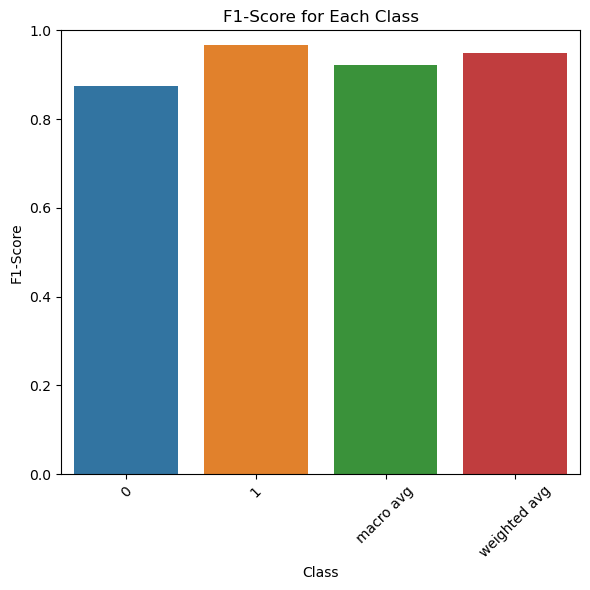

In [31]:
report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()
df_report = df_report.drop(['accuracy'])

plt.figure(figsize=(6, 6))
sns.barplot(x=df_report.index, y='f1-score', data=df_report, palette='tab10')

plt.title('F1-Score for Each Class')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [35]:
# Add import to improve model
!pip install optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import optuna
from sklearn.metrics import (f1_score, precision_score, recall_score,roc_auc_score)

In [39]:
def safe_xgb_pipeline(X, y):
    # # Balancing the data
    # print(f"Class distribution: {np.bincount(y)}")
    # smoteenn = SMOTEENN(random_state=23)
    # X, y = smoteenn.fit_resample(X, y)
    # print(f"After SMOTEENN: {np.bincount(y)}")

    # # Scaling
    # scaler = StandardScaler()
    # X_scaled = scaler.fit_transform(X)

    # X_train, X_test, y_train, y_test = train_test_split(
    #     X_scaled, y,
    #     test_size=0.2,
    #     random_state=23,
    #     stratify=y
    # )

    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.2, 
        random_state=23, 
        stratify=y
    )

    # Balancing train (only, not all data)
    smoteenn = SMOTEENN(random_state=23)
    X_train, y_train = smoteenn.fit_resample(X_train, y_train)

    # Scaling train/test
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test  = scaler.transform(X_test)

    # Calculating class weights
    neg, pos = np.bincount(y_train)
    scale_pos_weight = neg / pos
    print(f"scale_pos_weight = {scale_pos_weight:.2f}")

    # Cross-validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 200, 800),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "max_depth": trial.suggest_int("max_depth", 3, 8),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
            "gamma": trial.suggest_float("gamma", 0.0, 5.0),
            "random_state": 43,
            "eval_metric": "logloss",
            "scale_pos_weight": scale_pos_weight,
            "n_jobs": -1
        }
        model = XGBClassifier(**params)
        cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy", n_jobs=-1)
        return cv_scores.mean()

    # Search hyperparamaters
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50, show_progress_bar=True)

    print("Best params:", study.best_params)
    print("Best CV accuracy:", study.best_value)

    # Train the final model on the best parameters
    best_model = XGBClassifier(**study.best_params, eval_metric="logloss", scale_pos_weight=scale_pos_weight, random_state=43, n_jobs=-1)
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_pred_proba)
    cm   = confusion_matrix(y_test, y_pred)

    print("\n📊 Final Evaluation on Test Set")
    print(f"Accuracy : {acc:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"ROC-AUC  : {auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return best_model, X_test, y_test, y_pred, y_pred_proba

model, X_test, y_test, y_pred, y_pred_proba = safe_xgb_pipeline(X, y)

[I 2025-08-20 10:04:09,658] A new study created in memory with name: no-name-918917a7-e724-4765-964c-bdbc501238f4


scale_pos_weight = 1.19


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-08-20 10:04:11,276] Trial 0 finished with value: 0.8843843843843844 and parameters: {'n_estimators': 746, 'learning_rate': 0.01911897563447561, 'max_depth': 3, 'subsample': 0.7067473591266225, 'colsample_bytree': 0.795312361369479, 'min_child_weight': 10, 'gamma': 1.0748532734909566}. Best is trial 0 with value: 0.8843843843843844.
[I 2025-08-20 10:04:12,483] Trial 1 finished with value: 0.8845345345345346 and parameters: {'n_estimators': 702, 'learning_rate': 0.14976875842882703, 'max_depth': 7, 'subsample': 0.7420547789611003, 'colsample_bytree': 0.7440868828590401, 'min_child_weight': 7, 'gamma': 1.8739302997966072}. Best is trial 1 with value: 0.8845345345345346.
[I 2025-08-20 10:04:13,663] Trial 2 finished with value: 0.8954954954954957 and parameters: {'n_estimators': 704, 'learning_rate': 0.1420516524646191, 'max_depth': 3, 'subsample': 0.7092775269930592, 'colsample_bytree': 0.7070045075343637, 'min_child_weight': 2, 'gamma': 3.692989467475848}. Best is trial 2 with val

In [40]:
y_pred = model.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.44%


## Conclusion :

I've trained model using XGBoost algorithm and find a solution to get accuracy above 95 %. I use SMOTEENN to balance the classes and remove the bias towards the sick patients. First I split data on train and test, than used SMOTEENN and StandardScaler only on train. This removed data leakage (information leakage from test to training). Also I Used Optuna to optimize XGBoost with parameters : max_depth, learning_rate, n_estimators, subsample, colsample_bytree, gamma, min_child_weight. I used scale_pos_weight = neg/pos (the ratio of the number of negative to positive examples) to handle class disbalance. F1-score, Precision, Recall, ROC-AUC metrics better show how well the model identifies the rare class (healthy people).